In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel(r"D:\Xena\project\800CT-Twin-B08QCX9WKH.xlsx",parse_dates=True)
df

,Time,Units Ordered
0,2021-02-16 00:00:00,0
1,2021-02-17 00:00:00,1
2,2021-02-18 00:00:00,1
3,2021-02-19 00:00:00,2
4,2021-02-20 00:00:00,6
...,...,...
582,2022-09-21 00:00:00,4
583,2022-09-22 00:00:00,6
584,2022-09-23 00:00:00,4
585,2022-09-24 00:00:00,3


In [3]:
type(df['Time'])

pandas.core.series.Series

In [4]:
df['Time']= pd.to_datetime(df['Time'])

In [5]:
df['Time']

0     2021-02-16
1     2021-02-17
2     2021-02-18
3     2021-02-19
4     2021-02-20
         ...    
582   2022-09-21
583   2022-09-22
584   2022-09-23
585   2022-09-24
586   2022-09-25
Name: Time, Length: 587, dtype: datetime64[ns]

In [6]:
df['Time']= df['Time'].dt.strftime('%d-%m-%Y')
df

,Time,Units Ordered
0,16-02-2021,0
1,17-02-2021,1
2,18-02-2021,1
3,19-02-2021,2
4,20-02-2021,6
...,...,...
582,21-09-2022,4
583,22-09-2022,6
584,23-09-2022,4
585,24-09-2022,3


In [7]:
df= df.set_index('Time')
df

,Units Ordered
Time,
16-02-2021,0
17-02-2021,1
18-02-2021,1
19-02-2021,2
20-02-2021,6
...,...
21-09-2022,4
22-09-2022,6
23-09-2022,4


<AxesSubplot:xlabel='Time'>

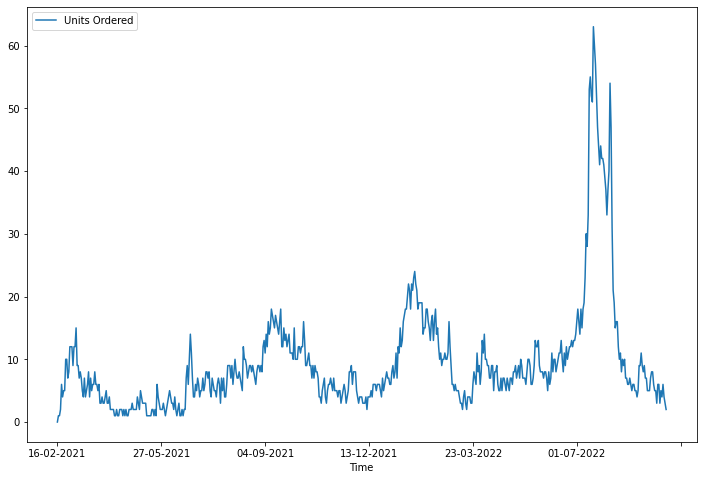

In [8]:
df.plot(figsize=(12,8))

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

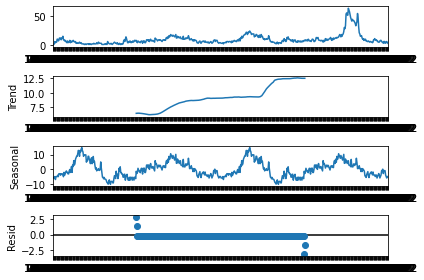

In [10]:
sd= seasonal_decompose(df, period=293)
sd.plot();

In [11]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey fuller test")
dftest= adfuller(df['Units Ordered'], autolag='AIC')

dfout= pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical Values (%s)'%key]= value
print(dfout)

Results of Dickey fuller test
Test Statistics                 -3.290445
p-value                          0.015311
#Lags used                       0.000000
Number of observations used    586.000000
Critical Values (1%)            -3.441558
Critical Values (5%)            -2.866485
Critical Values (10%)           -2.569403
dtype: float64


In [12]:
train_data= df.iloc[:470]
test_data = df.iloc[470:]

In [13]:
train_data

,Units Ordered
Time,
16-02-2021,0
17-02-2021,1
18-02-2021,1
19-02-2021,2
20-02-2021,6
...,...
27-05-2022,8
28-05-2022,8
29-05-2022,8


In [14]:
test_data

,Units Ordered
Time,
01-06-2022,8
02-06-2022,7
03-06-2022,5
04-06-2022,8
05-06-2022,6
...,...
21-09-2022,4
22-09-2022,6
23-09-2022,4


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
train= scaler.fit_transform(train_data)
test= scaler.transform(test_data)

In [17]:
len(train)

470

In [18]:
len(test)

117

In [19]:
X_train = []
Y_train = []

In [20]:
timesteps = 3

In [21]:
for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])

In [22]:
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [23]:
X_train

array([[[0.        ],
        [0.04166667],
        [0.04166667]],

       [[0.04166667],
        [0.04166667],
        [0.08333333]],

       [[0.04166667],
        [0.08333333],
        [0.25      ]],

       ...,

       [[0.375     ],
        [0.33333333],
        [0.33333333]],

       [[0.33333333],
        [0.33333333],
        [0.33333333]],

       [[0.33333333],
        [0.33333333],
        [0.29166667]]])

In [24]:
len(X_train)

467

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers

In [27]:
X_train.shape

(467, 3, 1)

In [28]:
model = Sequential()

model.add(LSTM(32,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,activation = 'relu'))        
model.add(LSTM(16,activation = 'relu',return_sequences = True))
model.add(LSTM(8,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(X_train,Y_train,epochs = 100,verbose = 1,shuffle = False)

Epoch 1/100
15/15 [==============================] - 2s 7ms/step - loss: 0.1218
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0953
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0684
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0426
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0224
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0203
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0180
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 11/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 12/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 13/100
15/15 [=================

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
X_test = []
Y_test = []

    # Loop for testing data
for i in range(50,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [32]:
Y_hat = model.predict(X_test)
mse = mean_squared_error(Y_test,Y_hat)
rmse = np.sqrt(mse)
r = r2_score(Y_test,Y_hat)
print(mse, rmse, r)

0.032044346467323806 0.17900934743002614 0.91430678457313


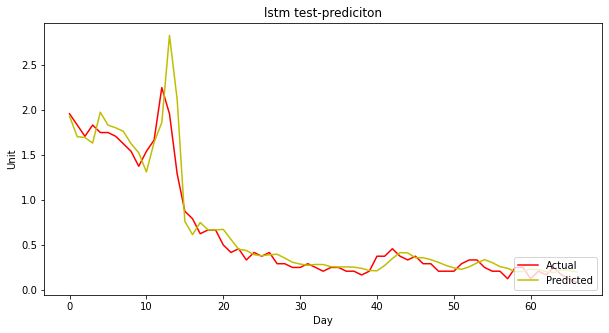

In [42]:
plt.plot(Y_test,c = 'r')
plt.plot(Y_hat,c = 'y')
plt.xlabel('Day')
plt.ylabel('Unit')
plt.title('lstm test-prediciton')
plt.legend(['Actual','Predicted'],loc = 'lower right')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [34]:
y_hat = model.predict(X_train)
mse = mean_squared_error(Y_train,y_hat)
rmse = np.sqrt(mse)
r = r2_score(Y_train,y_hat)
print(mse, rmse, r)

0.0059536628399805645 0.07715998211495752 0.840709762572493


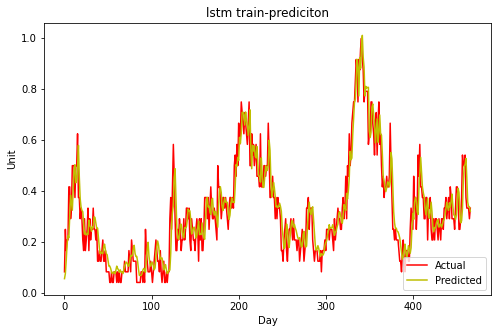

In [41]:
plt.plot(Y_train,c = 'r')
plt.plot(y_hat,c = 'y')
plt.xlabel('Day')
plt.ylabel('Unit')
plt.title('lstm train-prediciton')
plt.legend(['Actual','Predicted'],loc = 'lower right')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()